In [1]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout, execute_plot

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


In [2]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [3]:
random_runs = [
    'kobybibas/pnml_for_active_learning/1bbglago',
    'kobybibas/pnml_for_active_learning/19zgsvsq',
    'kobybibas/pnml_for_active_learning/37bpimwr',
    'kobybibas/pnml_for_active_learning/20zs9ve3',
    'kobybibas/pnml_for_active_learning/3kolqa1l',
    'kobybibas/pnml_for_active_learning/3stvad2p'
]
bald_runs = [
    'kobybibas/pnml_for_active_learning/2otgvdyj',
    'kobybibas/pnml_for_active_learning/2k88fmjo',
    'kobybibas/pnml_for_active_learning/iuuz9h6u',
    'kobybibas/pnml_for_active_learning/1iqh7t2a',
    'kobybibas/pnml_for_active_learning/4xon31lm',
    'kobybibas/pnml_for_active_learning/1jzdee7h'
]
pnml_runs = [
    'kobybibas/pnml_for_active_learning/30d9gtz6',
    'kobybibas/pnml_for_active_learning/140fffra',
    'kobybibas/pnml_for_active_learning/3lfojzff',
    'kobybibas/pnml_for_active_learning/3fktwwna',
    'kobybibas/pnml_for_active_learning/2z388i0m',
    'kobybibas/pnml_for_active_learning/1pyv0bt6'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/1bbglago
kobybibas/pnml_for_active_learning/19zgsvsq
kobybibas/pnml_for_active_learning/37bpimwr
kobybibas/pnml_for_active_learning/20zs9ve3
kobybibas/pnml_for_active_learning/3kolqa1l
kobybibas/pnml_for_active_learning/3stvad2p
kobybibas/pnml_for_active_learning/2otgvdyj
kobybibas/pnml_for_active_learning/2k88fmjo
kobybibas/pnml_for_active_learning/iuuz9h6u
kobybibas/pnml_for_active_learning/1iqh7t2a
kobybibas/pnml_for_active_learning/4xon31lm
kobybibas/pnml_for_active_learning/1jzdee7h
kobybibas/pnml_for_active_learning/30d9gtz6
kobybibas/pnml_for_active_learning/140fffra
kobybibas/pnml_for_active_learning/3lfojzff
kobybibas/pnml_for_active_learning/3fktwwna
kobybibas/pnml_for_active_learning/2z388i0m
kobybibas/pnml_for_active_learning/1pyv0bt6


In [4]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)


CIFAR10


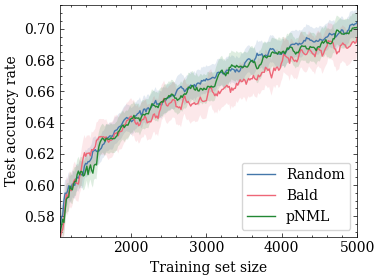

In [5]:
plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig,ax = execute_plot(random_res,bald_res,pnml_res,fig,ax)
ax.set_xlim(right=5000)
print("CIFAR10")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "cifar10.pdf"))
plt.show()